# Loading the dataset

In [13]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Dataset.csv to Salary_Dataset (1).csv


# Preproscessing the data

In [77]:
import pandas as pd

df = pd.read_csv("Salary_Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  32 non-null     float64
 1   Salary           32 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


Creating a scatter graph of data

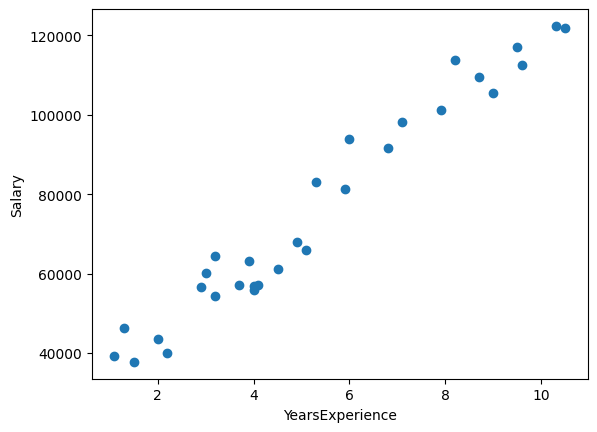

In [78]:
import matplotlib.pyplot as plt

plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

plt.show()

Removing rows with null values

In [79]:
df=df.dropna(axis=0,how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 32
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


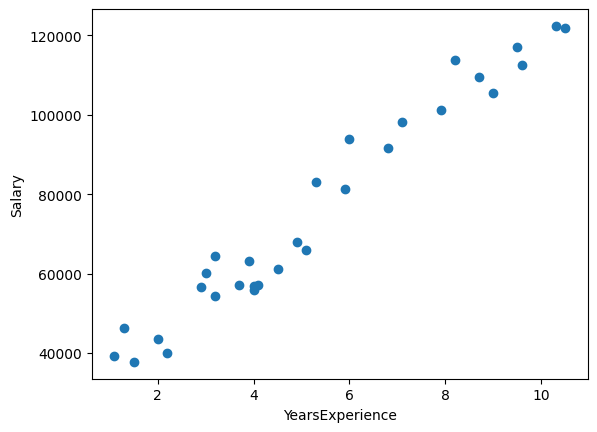

In [80]:
import matplotlib.pyplot as plt

plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

plt.show()

As we can see all there is no null data. All colums are usefull so we don't drop any rows are columns. We convert the dataset from pandas to numpy. As we already have very less data I did not remove the outlier/exception data

In [92]:
import numpy as np

#x is input set and y is output. We are doing supervised learning so we need both to train
X = df['YearsExperience'].to_numpy()
X = X.reshape(-1, 1)
print(X)
y = df['Salary'].to_numpy()
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]
 [ 9. ]
 [ 4.1]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  61111.  67938.  66029.  83088.  81363.
  93940.  91738.  98273. 101302. 113812. 109431. 116969. 112635. 122391.
 121872. 105582.  57081.]


# Split data into test and training set
will use 70%(21 data) as training and and 30% as testing(9 data)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit simple linear regression model to training set

In [94]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train,y_train)

This is the slope and intercept of the regression line created by the model.

In [95]:
#y axis intercept
print(model.intercept_)
#slope
print(model.coef_)

26086.93739599562
[9633.4328483]


This is the model's score

In [96]:
#checking the goodness of fit. Here we use the coeff. of determination
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9396583123899768
0.9703680610022763


# Predicting the testing set

In [97]:
predicted_values = model.predict(X_test)
print(predicted_values)

[ 40537.08666844 112787.83303066  69437.38521333  63657.32550435
 125311.29573344 117604.54945481 127237.9823031   64620.66878918
  82924.19120094]


# Visulaize the results
Create a regression line and check how much the predicted vs true scatter plots vary

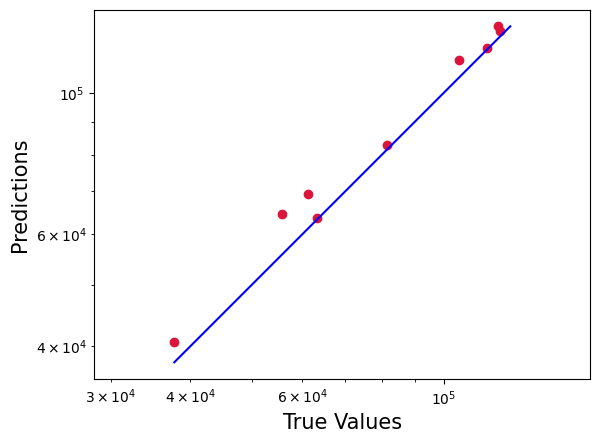

In [98]:
true_values = y_test
plt.scatter(true_values, predicted_values, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_values), max(true_values))
p2 = min(min(predicted_values), min(true_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Making new predictions

In [100]:
import numpy as np

new_predictions=[1.5,23,14,2.9,8]
new_predictions = np.array(new_predictions)
new_predictions = new_predictions.reshape(-1, 1)

model.predict(new_predictions)

array([ 40537.08666844, 247655.8929068 , 160954.99727214,  54023.89265605,
       103154.40018236])